## *Project 2*

### *Group 5*

#### Komal - 0783360
#### Nishtha Vijay Mistri - 0780925
#### Pushwinderjit Singh Mandahar - 0780371
#### Sesha sai manchala - 0789186
#### Venkata Bhagya Teja Maridu - 0788222

## Customer Segmentation Analysis Part 1

#### Q.  What is Customer Segmentation and why is it important from marketing perspective?

In Customer segmentation we divide the customers based on common characteristics – such as demographics or behaviors, so we can market to those customers more effectively.
- Market segmentation can help you to define and better understand your target audiences and ideal customers.
- It allows you to identify the right market for your products and then target your marketing more effectively.
- It allows you to target your content to the right people in the right way, rather than targeting the entire audience.


## Import Libraries and Data

In [1]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

# Check encoding in the dataset because if you load the dataset without encoding an error will occur

# pip install chardet
# import the chardet library and use the detect method to find the type of encoding

import chardet 

# 'rb' means read in the file as binary
with open("Sales_data.csv", 'rb') as file:
    print(chardet.detect(file.read()))

In [2]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.shape

(541909, 8)

In [5]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
wet                                      1
SET 10 CARD CHRISTMAS STAMPS 16963       1
BREAD BIN, DINER STYLE, MINT             1
broken                                   1
PEARL & SHELL 42"NECKL. IVORY            1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing
- Remove Null Values
- Remove Duplicate Values

In [6]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [7]:
data.shape

(406829, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [10]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [11]:
filtered_data.shape

(4380, 2)

In [12]:
filtered_data.head()

Country  CustomerID
0   United Kingdom     17850.0
9   United Kingdom     13047.0
26          France     12583.0
46  United Kingdom     13748.0
65  United Kingdom     15100.0

In [13]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights 
 - Top 10 country customer data 

In [14]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [15]:
filtered_data.Country.value_counts()[:10]


United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

<AxesSubplot:>

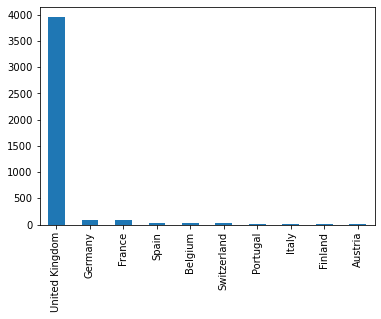

In [16]:
# Plot the data
filtered_data.Country.value_counts()[:10].plot(kind='bar')

####  Q. What do you observe?

From the above bar graph we can observe that maximum number of customers are from United Kingdom while minimum is observed from Italy followed by Finland and Austria.

In [17]:
## Filter data by the top most country
uk_data=data[data.Country=='United Kingdom']

In [18]:
uk_data.describe()

Quantity      UnitPrice     CustomerID
count  361878.000000  361878.000000  361878.000000
mean       11.077029       3.256007   15547.871368
std       263.129266      70.654731    1594.402590
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   14194.000000
50%         4.000000       1.950000   15514.000000
75%        12.000000       3.750000   16931.000000
max     80995.000000   38970.000000   18287.000000

#### Q. What do you observe?  Which column needs special attention?

From the dataset we observe that some customers have ordered product in negative which is kind of impossible. So, we assume that quantity column need attention by filtering it from negative to positive or zero. The negative value may also mean that there might be return transaction in the data.

In [19]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [20]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [21]:
uk_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [22]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [23]:
# Calculate Total Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

##  Time frame of data

In [24]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


#### Q. Comment on the above results.

Min and max is used to find out the exact invoice date and time of united kingdom. The invoice data is from Jan 10, 2011 at 10:32 till Sept 9, 2011 at 10:52. 

## Perform RFM Analysis
- For Recency, Calculate the number of days between present date and date of last purchase for each customer.
- For Frequency, Calculate the number of orders for each customer.
- For Monetary, Calculate sum of purchase price for each customer

In [25]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [26]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [27]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [28]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

#### Q. Comment on the above results

The above code shows top five values of invoice number with order. Here we can observe that first invoice no. has 542 different order while second has 533 order and so on.


In [29]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

InvoiceNo         InvoiceDate  CustomerID  TotalPrice
0    536365 2010-12-01 08:26:00     17850.0      139.12
1    536366 2010-12-01 08:28:00     17850.0       22.20
2    536367 2010-12-01 08:34:00     13047.0      278.73
3    536368 2010-12-01 08:34:00     13047.0       70.05
4    536369 2010-12-01 08:35:00     13047.0       17.85

In [30]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [31]:
rfm

InvoiceDate  InvoiceNo  TotalPrice
CustomerID                                    
12346.0             325          1    77183.60
12747.0               2        103     4196.01
12748.0               0       4596    33719.73
12749.0               3        199     4090.88
12820.0               3         59      942.34
...                 ...        ...         ...
18280.0             277         10      180.60
18281.0             180          7       80.82
18282.0               7         12      178.05
18283.0               3        756     2094.88
18287.0              42         70     1837.28

[3921 rows x 3 columns]

In [32]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [33]:
rfm['recency'] = rfm['recency'].astype(int)

In [34]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [35]:
rfm.head()

monetary  frequency  recency
CustomerID                              
12346.0          325          1    77183
12747.0            2        103     4196
12748.0            0       4596    33719
12749.0            3        199     4090
12820.0            3         59      942

####  Q. What is wrong with this table think ??

In [36]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

##  Create Visuals
- Histogram for Recency Data
- Histogram for Frequency Data
- Histogram for Monetary Data


array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

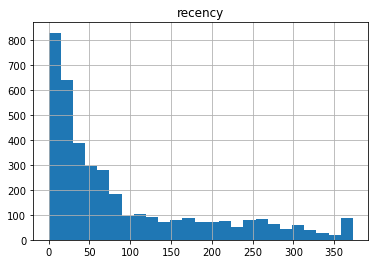

In [37]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency', bins=25)

####  Q. What does this above chart tell ?

The histogram has right-skewed distribution as it is biased toward left side with number of transactions. We can see that in united kingdom we have maximum customer with highest number of transaction which is  between 0-850. Based on that we can say that we have high customer within last 80 days, i.e, around last 2.5 months.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

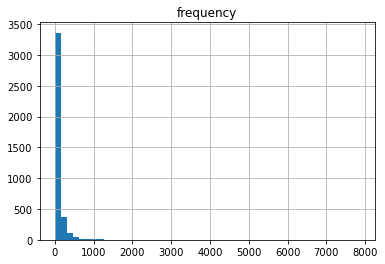

In [38]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency', bins=50)

####  Q. What does this above chart tell ?

From the histogram we can see that majority of customers who purchases is less than 500.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

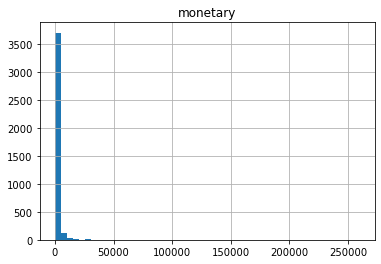

In [39]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=50)

rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary <10000]

rfm.tail(100)

# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=100)

####  Q. What does this above chart tell ?

We can clearly see that the customers spend is mostly less than $1000. This might be because they are buying more product or accessories.

In [40]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[2.34412669e+00 4.10395112e-01 1.00681678e+01]
 [9.01587778e-01 5.79924468e-02 3.11801579e-01]
 [9.21685081e-01 2.06900052e+01 4.25821942e+00]
 ...
 [8.51344520e-01 3.59882729e-01 2.25295154e-01]
 [8.91539127e-01 3.05659123e+00 3.08216554e-02]
 [4.99641715e-01 9.35447047e-02 3.53221728e-03]]


In [41]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

## Calcualte the RFM Score 

In [42]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 12.0, 0.4: 32.0, 0.6: 71.0, 0.8: 178.0},
 'frequency': {0.2: 13.0, 0.4: 29.0, 0.6: 58.0, 0.8: 120.0},
 'monetary': {0.2: 241.0, 0.4: 465.0, 0.6: 897.0, 0.8: 1957.0}}

In [43]:

# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [44]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [45]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [46]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

recency  frequency  monetary  R  F  M RFM Score
CustomerID                                                 
12346.0         325          1     77183  1  1  5       115
12747.0           2        103      4196  5  4  5       545
12748.0           0       4596     33719  5  5  5       555
12749.0           3        199      4090  5  5  5       555
12820.0           3         59       942  5  4  4       544

In [47]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

recency  frequency  monetary  R  F  M RFM Score    Segment
CustomerID                                                            
12346.0         325          1     77183  1  1  5       115    at risk
12747.0           2        103      4196  5  4  5       545  champions
12748.0           0       4596     33719  5  5  5       555  champions
12749.0           3        199      4090  5  5  5       555  champions
12820.0           3         59       942  5  4  4       544  champions

In [48]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          74
new customers       146
needs attention     486
loyal customers     722
champions          1012
at risk            1481
Name: Segment, dtype: int64

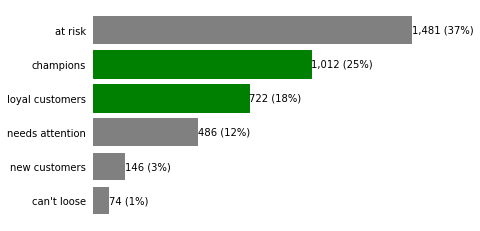

In [49]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

#### Q. Comment on the above chart

We can tell from above graph that about 49% customer are at risk i.e., purchased often but a long time ago followed by 25% champions which are considered as best customer as they are heavy spenders and also they can be considered as most loyal customers as they have the habit to order. There are 18% loyal customer who buy on regular basis. There are only 3% customers who comes in new customer category while around 12% customer who needs attention. Few loyal customer still stick with the product which is good thing. There are around 1% customers who we can't loose, although the last shopping date of customers is on average and they havn't made purchase recently. These customers used to purchase frequently but haven't returned for a long time. For this reason, we need to give some discount or gift card.

#### Q. Who are the best customers?

I think that Champions customers can be considered as best customer as they are bought recently and are heavy spenders followed by loyal customers who are always there with the company. We can reward them multiple purchases coupon or send them personalized emails/messages to encourage them to order. We can also notify them about the discounts to keep them spending more and more money on products. We can also create loyalty cards in which they can gain points on each purchase and further those points can be transfer into a discount.

In [50]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score    Segment
CustomerID                                                            
18102.0           0        431    259657  5  5  5       555  champions
17450.0           8        337    194550  5  5  5       555  champions
17511.0           2        963     91062  5  5  5       555  champions
16684.0           4        277     66653  5  5  5       555  champions
14096.0           4       5111     65164  5  5  5       555  champions

#### Q. Which customers are likely to churn?

Customers at risk are more likely to churn as they spent big money and purchased often but long time ago. We can bring them back by newer product or rewarding them some discount.

In [51]:
#Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score      Segment
CustomerID                                                              
12346.0         325          1     77183  1  1  5       115      at risk
15749.0         235         10     44534  1  1  5       115      at risk
15098.0         182          3     39916  1  1  5       115      at risk
13093.0         275        159      7832  1  5  5       155  can't loose
17850.0         372        297      5391  1  5  5       155  can't loose

#### Q. Which customers we are going to loose?

Customers who are at risk has more chances to loose followed by can't loose customer as they used to purchase frequently but haven’t returned for a long time.

In [52]:
#Customers who's recency, frequency and monetary values are low 

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score  Segment
CustomerID                                                          
13747.0         373          1        79  1  1  1       111  at risk
14237.0         373          9       161  1  1  1       111  at risk
17643.0         373          8       101  1  1  1       111  at risk
15350.0         373          5       115  1  1  1       111  at risk
13011.0         372          3        50  1  1  1       111  at risk

#### Q. Who are the loyal customers?

Loyal customer buy on regular basis and spent the most. They are always with the company and buy often. We can ask their review and engage them with relevant product.

In [53]:
#Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score          Segment
CustomerID                                                                  
18102.0           0        431    259657  5  5  5       555        champions
17450.0           8        337    194550  5  5  5       555        champions
17511.0           2        963     91062  5  5  5       555        champions
16029.0          38        242     81024  3  5  5       355  loyal customers
16684.0           4        277     66653  5  5  5       555        champions

## Calculate RFM scores using 4 quintiles instead of 5 and answer all the questions again
- Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6


In [54]:
# Use quintiles to to make 4 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .50, .75]).to_dict()
quintiles
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 4
    elif x <= quintiles['recency'][.50]:
        return 3
    elif x <= quintiles['recency'][.75]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.50]:
        return 2
    elif x <= quintiles[c][.75]:
        return 3
    else:
        return 4  
#Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

# Create the customer segments based on your knowledge. 
# Create 5 segments based on R and F scores

segments = {
    '[1-2][1-5]': 'at risk',
    '3[1-3]': 'Need attention',
    '[4-5][1-3]': 'Promising',
    '[3-5][4-5]': 'loyal customers',
   
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

recency  frequency  monetary  R  F  M RFM Score          Segment
CustomerID                                                                  
12346.0         325          1     77183  1  1  4       114          at risk
12747.0           2        103      4196  4  4  4       444  loyal customers
12748.0           0       4596     33719  4  4  4       444  loyal customers
12749.0           3        199      4090  4  4  4       444  loyal customers
12820.0           3         59       942  4  3  3       433        Promising

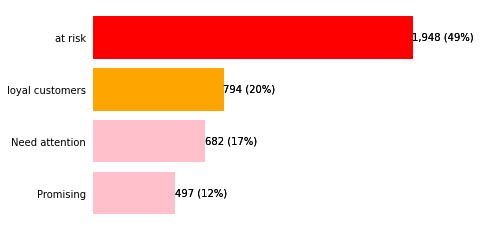

In [55]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='pink')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['at risk']:
            bar.set_color('red')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['loyal customers']:
            bar.set_color('orange')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

#### Q. Comment on the above chart

We can tell from above graph that about 49% customer are at risk i.e., purchased often but a long time ago followed by 20% loyal customer who buy on regular basis. If we look at customer who need attention then we can say that around 17% need attention. There are 12% promising customer whi were recent shoppers but haven't spent much. We can create brand awareness from time to time and offer free trials to get them back.

#### Q. Who are the best customers?

Loyal customers are considered as best customers as they spent good money and somewhat responsive for the promotion. We can provide them special discount and engage them.

In [56]:
rfm[rfm['RFM Score']=='444'].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score          Segment
CustomerID                                                                  
18102.0           0        431    259657  4  4  4       444  loyal customers
17450.0           8        337    194550  4  4  4       444  loyal customers
17511.0           2        963     91062  4  4  4       444  loyal customers
16684.0           4        277     66653  4  4  4       444  loyal customers
14096.0           4       5111     65164  4  4  4       444  loyal customers

#### Q. Which customers are likely to churn?

Customer who are at risk are more likely to churn. Those customer spend money and purchased often long ago. We need to brink those customer by sending personalized email or by offering renewals.

In [57]:
#Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score  Segment
CustomerID                                                          
12346.0         325          1     77183  1  1  4       114  at risk
15749.0         235         10     44534  1  1  4       114  at risk
15098.0         182          3     39916  1  1  4       114  at risk
13093.0         275        159      7832  1  4  4       144  at risk
12980.0         157         20      7374  1  2  4       124  at risk

#### Q. Who are the loyal customers?

Loyal customer spent money very often and engage for long time. They are also responsive to promotion.

In [58]:
#Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

recency  frequency  monetary  R  F  M RFM Score          Segment
CustomerID                                                                  
18102.0           0        431    259657  4  4  4       444  loyal customers
17450.0           8        337    194550  4  4  4       444  loyal customers
17511.0           2        963     91062  4  4  4       444  loyal customers
16029.0          38        242     81024  3  4  4       344  loyal customers
16684.0           4        277     66653  4  4  4       444  loyal customers

## Can you create segments based on F and M scores. This is an extra exercise for groups who want to try more. It is not mandatory.

# Customer Segmentation Analysis Part 2

In [59]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [60]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')
rfm.head()

recency  frequency  monetary
CustomerID                              
12346.0         325          1     77183
12747.0           2        103      4196
12748.0           0       4596     33719
12749.0           3        199      4090
12820.0           3         59       942

<AxesSubplot:>

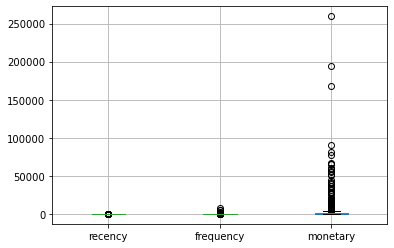

In [61]:
# Create box plots to check for outliers
rfm.boxplot()

In [62]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[2.34412669e+00 4.10395112e-01 1.00681678e+01]
 [9.01587778e-01 5.79924468e-02 3.11801579e-01]
 [9.21685081e-01 2.06900052e+01 4.25821942e+00]
 ...
 [8.51344520e-01 3.59882729e-01 2.25295154e-01]
 [8.91539127e-01 3.05659123e+00 3.08216554e-02]
 [4.99641715e-01 9.35447047e-02 3.53221728e-03]]


In [63]:
rfm_clean = rfm[(z < 3).all(axis=1)]

### Q. What is the purpose of the above code

In this code we want to remove or filter the outliers and get the clean data. This can be done with just one line code as we have already calculated the Z-score.The above code filters out all RFM normalised values that are less than three for all columns.

In [64]:
rfm.shape

(3921, 3)

In [65]:
rfm_clean.shape

(3868, 3)

### Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

<AxesSubplot:>

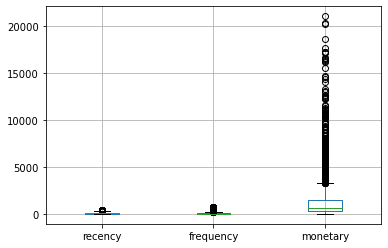

In [66]:
rfm_clean.boxplot()

The circles in the above output indicate outliers, and there are many outliers in the monetary, although recency and frequency both have very few outliers. When compared with the previous plot, we can clearly see that monetary has the most outliers after cleaning the data, but recency and frequency are similar.

### Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms

array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

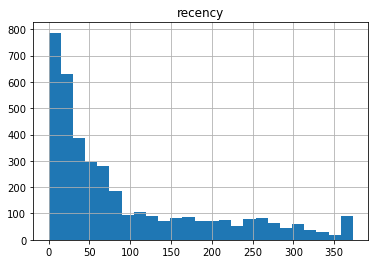

In [67]:
# Histogram for Recency Data (UK)
rfm_clean.hist(column='recency', bins=25)

The histogram has a right skewed distribution.In UK, we have maximum customers with highest number of transaction ranging from 0 to nearly 800. But with uncleaned data, we could see that the highest number of transaction among UK customers ranged from 0 to 850.We can say that we have more customers within last 2.5 to 3 months.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

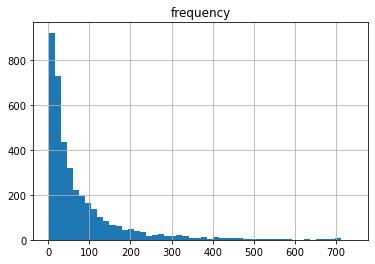

In [68]:
# Histogram for Frequency Data (UK)
rfm_clean.hist(column='frequency', bins=50)

There is more clear view from the above right skewed histogram that most of the customers purchases is less than 200 while in the previous histogram we could see that majority of customers purchases is less than 500.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

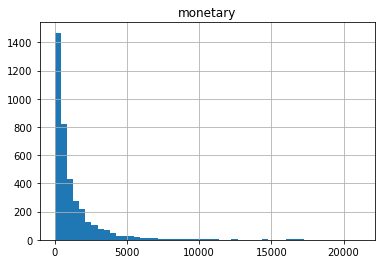

In [69]:
# Histogram for Monetary Data (UK)
rfm_clean.hist(column='monetary',bins=50)

Above histogram depicts that the customers from UK spend primarily less than $2000  and  very  few customers spendings are more than $5000.It might be because their spendings are more on products or accessories. After comparing with the above histogram we can conclude that customer spending has been increased from $1000 to $2000 which is very good.

## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [70]:
X = rfm

In [71]:
X.head()

recency  frequency  monetary
CustomerID                              
12346.0         325          1     77183
12747.0           2        103      4196
12748.0           0       4596     33719
12749.0           3        199      4090
12820.0           3         59       942

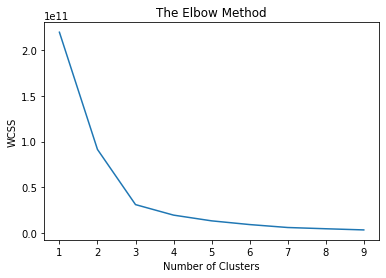

In [72]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [74]:
y_kmeans

array([2, 0, 2, ..., 0, 0, 0])

In [75]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [76]:
rfm.head()

recency  frequency  monetary  Cluster_ID
CustomerID                                          
12346.0         325          1     77183           2
12747.0           2        103      4196           0
12748.0           0       4596     33719           2
12749.0           3        199      4090           0
12820.0           3         59       942           0

## Plot the graphs

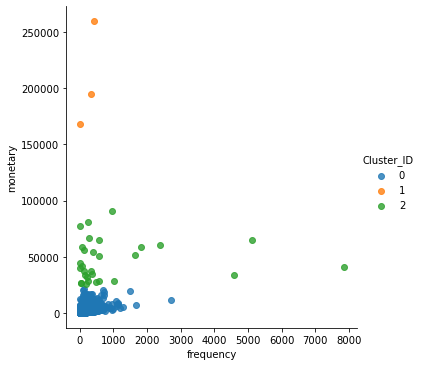

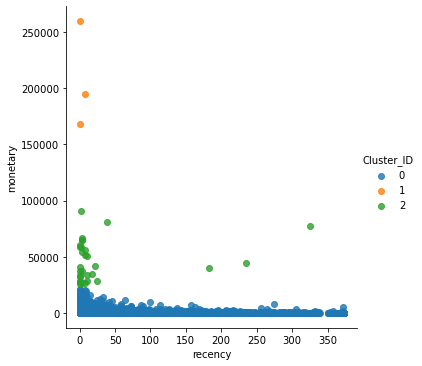

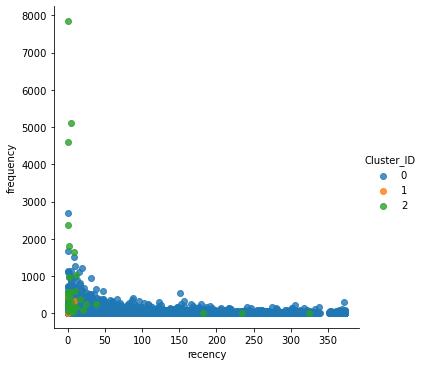

In [77]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

### Q. Comment on the plots

**Frequency vs Monetory**

In this plot the blue cluster customers are more scattered, these customers has the high frequency value which means these are the customers who spend more and shop more frequently whereas green cluster customers are the ones who spend more though the frequency is less compared to the orange cluster customers. Orange cluster customers are the ones who spend and shop less frequently compared to the other two clusters.

**Recency vs Monetory**

In this plot blue cluster customers are who's recency is above 350 yet monetory value is low with value 1100 that means cutomer buy recently by there purchase of amount is not too high. Most of green cluster customers recency is around 380 but they are more scattered and monetory value is below 1000 . Orange cluster customers monetory value is more (between 150000-250000) compared to the other two cluster groups but the recency value is less compared to other groups most of the customers recency value is between 0 - 30.

**Recency vs Frequency**

In this plot the recency value of blue cluster customer ranges from 0-380 and frequency is 0-1000 which means customer buy recently and frequently. Green cluster customer recency ranges from 0-350 and frequency is 0-2000 and above. Orange cluster customer recency ranges from 0-25 and frequency ranges from 0- 500.


### Q. Perform Cluster Analysis with k=4

In [78]:
X1 = rfm_clean

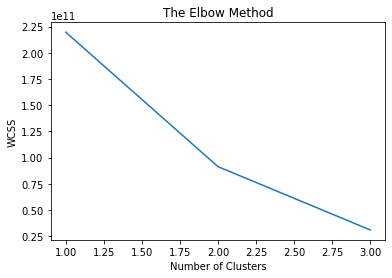

In [80]:
wcss = []
for i in range(1,4):
    kmeans = KMeans(n_clusters =i, 
                    init = 'k-means++', 
                    max_iter =300, n_init =10, 
                    random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

In [81]:
X1.head()

recency  frequency  monetary
CustomerID                              
12747.0           2        103      4196
12749.0           3        199      4090
12820.0           3         59       942
12821.0         214          6        92
12822.0          70         46       948

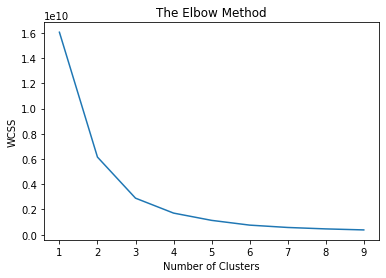

In [82]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X1)

In [84]:
y_kmeans

array([0, 0, 1, ..., 1, 1, 1])

In [85]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = y_kmeans

<ipython-input-85-1675166c0176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster_ID'] = y_kmeans


In [86]:
rfm_clean.head()

recency  frequency  monetary  Cluster_ID
CustomerID                                          
12747.0           2        103      4196           0
12749.0           3        199      4090           0
12820.0           3         59       942           1
12821.0         214          6        92           1
12822.0          70         46       948           1

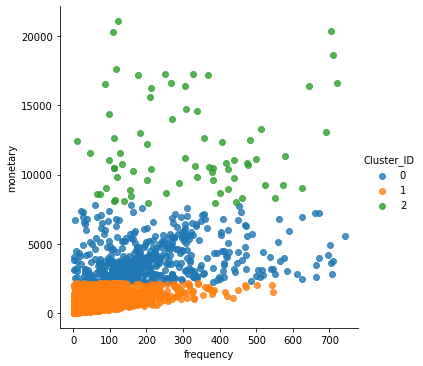

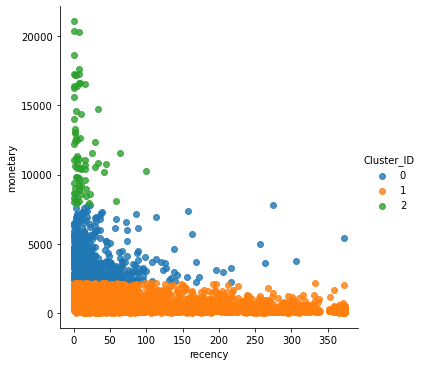

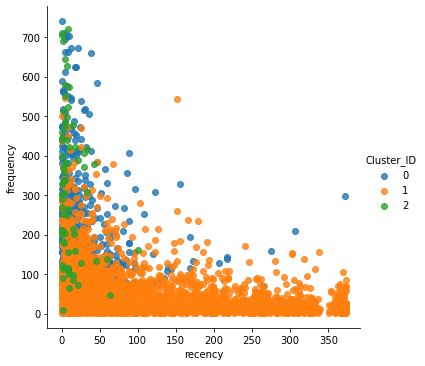

In [87]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

After removing the outliers, we choose to take k value as 3 for the above plots

**Frequency vs Monetory**

In this plot the orange cluster customers are more scattered, these customers has the high monetory value which means these are the customers who spend more and shop more frequently and green cluster customers are the ones who spend more though the frequency is less compared to the orange cluster customers. Blue cluster customers are the ones who spend and shop less frequently compared to the other two clusters.

**Recency vs Monetory**

In this plot blue cluster customers are who's recency is above 350 yet monetory value is low with value 1000 that means customers buy recently but they spending is less that 1000. Most of green cluster customers recency is around 225 and monetory value is between 1000 to 2800. Orange cluster customers monetory value is more (between 2800-6000) compared to the other two cluster groups but the recency value is less compared to other groups most of the customers recency value is between 0 - 150.

**Recency vs Frequency**

In this plot the recency value of blue cluster customer ranges from 0-350 and frequency is 0-250 that means customer buy recently and frequently. Green cluster customer recency ranges from 0-350 and frequency is 0-400 and above. Orange cluster customer recency ranges from 0-380 and frequency ranges from 0- 300 and above which means there are some customers which buy recently and frequently.


**Characteristics of Blue, Orange and Green groups minimum maximum values of RFM of each segment**       

|   | Blue  |    Orange    |   Green  |          
|  ---:  |  :-----  |  :------  |  :------  |      
|   Frequency   |   0-300   |  0-300  |  0-400   | 
|   Recency  |   0-350  |  0-350  |  0-380   | 
|  Monetory  |  0-1000  |  2800 - 6000  |  1000 - 2800  | 

# Calculate mean for every cluster 
for i in range(4):
    rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

## Perform cluster analysis using hierarchical clustering with the cleaned rfm dataframe

In [88]:
# Import the libraries
import scipy.cluster.hierarchy as sch

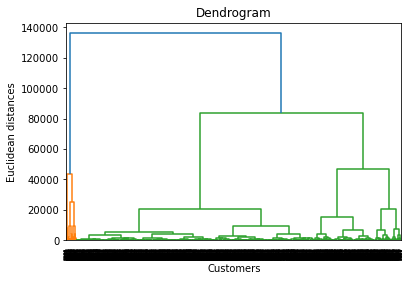

In [89]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Identify the clusters based on dendrogram

In [90]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

In [91]:
X1['Cluster_ID'] = y_hc

<ipython-input-91-343db62683d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Cluster_ID'] = y_hc


In [92]:
X1.head()

recency  frequency  monetary  Cluster_ID
CustomerID                                          
12747.0           2        103      4196           0
12749.0           3        199      4090           0
12820.0           3         59       942           0
12821.0         214          6        92           0
12822.0          70         46       948           0

### Q. Create all the three plots again. Do you observe any differences from k-means clustering method

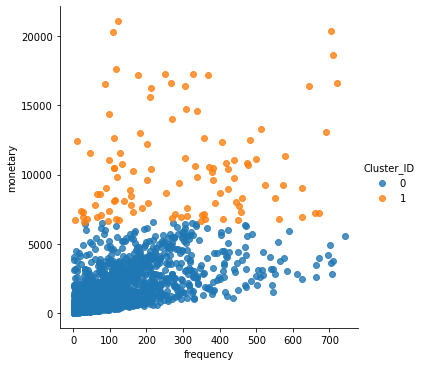

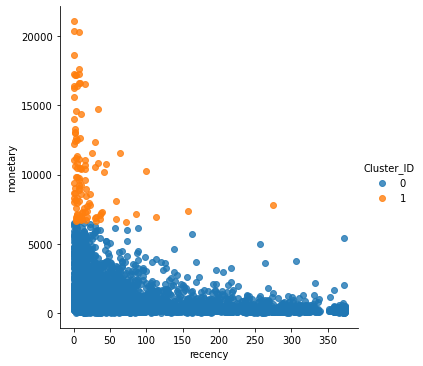

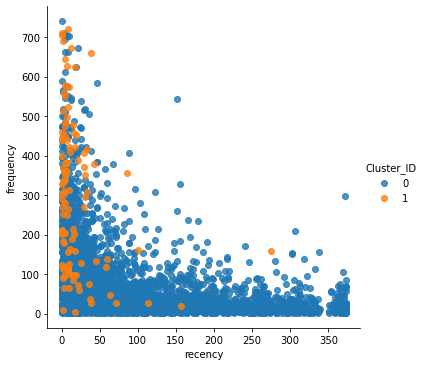

In [93]:
# Create a plot for frequency vs monetary 

facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs monetary

facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

# Create a plot for recency vs frequency

facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

The difference between k fold and above plots is that there are only two clusters created, whereas in K folds there might be 'k' number of clusters.

## Evaluate Clustering 

In [94]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [95]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X1)

  silhouette_avg = metrics.silhouette_score(X1, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

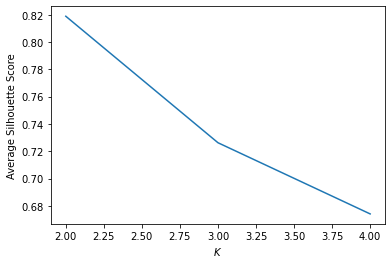

In [96]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()